In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# Hw 3: Sentiment Analysis on Twitter Data 🐦

Name: Nina Redpath

Student ID: 458234

Collaborators: N/A

## Instructions

For this homework, work through **Lab 3 (Sentiment Analysis on Movie Reviews)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, and a legend if it is applicable).

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will be taken into account during the grading and regrading process.

In [2]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add you solution after that line. 

### Some imports and configurationsimport twitter

In [3]:
import twitter

import sys
import re, string
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 1. API Usage

APIs, or "application programming interface," are tools and routines used to build software applications. For example, Twitter uses an API to allow different programs and projects to access different aspects of Twitter. With some APIs, one would be able to post to Twitter, or perhaps search for different tweets (which will be used within this homework). 

### Public and Secret Keys

This Twitter API, along with many others, utilizes public and secret keys to make sure that only validated individuals can access the API commands and functions. Plugging these into the program can validate the user and allow the API to know who is using which commands. For the most part, these APIs (or companies) make it pretty easy to receive their own API keys to be used for a number of processes. 

### Creating and Accessing API Keys

To create your own API Keys for Twitter Data, the steps are quite simple! While this does require a Twitter account, there is no extra information or payment necessary to access this data.

First, go to https://developer.twitter.com and sign in to your account. If you do not have a Twitter account (or don't want to link your personal account), you can use a separate email for this.

Next, click on Apps and fill out the forms to the best of your ability (not all information is necessary and where applicable, note that this is for a university course/academic use). This will require a phone number, which Twitter uses as a safety check (they don't hand out API keys to just everyone!).

Once approved, click on Keys and Tokens, and you should find your API Keys and access tokens!

**PLEASE READ:** If you are not approved within a timely manner, you may use someone else's (approved) account's key and access token. Please do not wait until the last day to do this!!! Give yourself ample time to finish the assignment. Alternatively, you can contact us via Piazza and we can provide a zipped `sampleTwitterData` folder for you to work with. This is only to be used in an emergency case. In this **pre-scraped** data, there are 10 CSV files containting the tweets for 10 keywords and each CSV has over 500 tweets, but these tweets are **not** processed! You will still need to implement and run an appropriate version of `preProcess()` (under problem 1) on that data.

<!-- BEGIN QUESTION -->

### Problem 1.1

**Do this!** Create a variable `api` and assign it the result of the `twitter.Api` function with the appropriate arguments. Ignore any arguments that are not realted to your consumer information or access tokens. Enable `sleep_on_rate_limit`.  

> **Hint**: Use the `?` character IPython's tool to explore documentation to find our what arguemnts are needed.

In [5]:
# twitter.Api?
api = twitter.Api(consumer_key='rlxkBZsrWbpQXsWg8yu9v0KMm', application_only_auth=True, consumer_secret = 'cd10tJrf2JLpHhQfr6cBGVmE0kiE1dxZGinb3iE1tCsjepl7af', access_token_key= 'AAAAAAAAAAAAAAAAAAAAALPIUAEAAAAAK872jPoxR1iYI0PIivexAMjHo%2BU%3DA4o7evLl6iFfErvfJcPpGRmFi72AkuKuO8S5MKdwcgxx6AoDBI', sleep_on_rate_limit = True)


<!-- END QUESTION -->

## 2. Get and Preprocess the Twitter Data

Let's start by adding in your Twitter API keys, which can be found from the Twitter developer website. This will give us access for searching tweets, but mostly **limiting us to the past week** and occasionally restricting the amount of tweets we can pull at a time.

Your next few tasks are to implement the following three functions that will pull and clean the information from Twitter. The last task will be conducting a sentiment analysis on the data that has been pulled! As a fair warning, Twitter data can be pretty messy; your results may not be nearly as clean as the movie dataset.

### Problem 2.1 

**Do this!** Complete the following function that will take an arbitrary search term and return a list of tweet words.

> **Hint**: Make sure it works before you continue. Look at the returned list, its length, and _some_ of its entries. **Best Practice**: Do not print out the entire list in the version of the notebook that you submit/deploy/share. 

In [8]:
grader.check("q2a")

q2a results: All test cases passed!

In [9]:
since_date = '2021-09-26'
until_date = '2021-09-30'
nr_of_tweets = 100
result_order = 'recent'
language = 'en'

def getResults(searchTerm, untilID):
    
    # This fuction will return a list of tweets.
    # We will use api.GetSearch() in order to pull the Twitter data
    #
    # There are several parameters that we will need to include:
    #
    #     term: string, the term that is being searched
    #     since: string in format 'YYYY-MM-DD' which will serve as the earliest date
    #     until: string in format 'YYYY-MM-DD' which will serve as the latest data 
    #     count: int, the number of tweets to return, max of 100
    #     result_type: string, type of sorting for tweets. Typically 'recent'
    #     max_id: int, another check to limit the tweets returned. Typically sys.maxsize
    #     lang: string, indication of the language being used. We recommend leaving lang as 'en'.
    #
    # You are free to change these however you wish.
    #
    # CAUTION: The 'since' variable must be at most a week prior to the current date!
    #          If you would like to search further, you must apply through Twitter
    results = api.GetSearch(term=searchTerm, since=since_date, until=until_date, count=nr_of_tweets,\
                            result_type=result_order, max_id=untilID, lang=language)
    
    return results

In [10]:
results = getResults("beans", sys.maxsize) # Replace this with your chosen search term!


### Problem 2.2

Now, we will need to process the tweets. 

**Do this!** Complete the following function that processes _one_ tweet. The function takes in a Twitter object from python-twitter representing one tweet and return the processed result! 
* Make sure to not consider _retweets_ (`result.retweeted_status`) or a _media posts_ (`result.media`).
    * If a `result` is one of those, return `None`. 
* Often there are links at the end of the tweet. Remove those by keep anything before `"https://"`.
* Remove whitespaces and newlines (`\n`).
Deal with punctuation within the tweets: 
* Remove most (if not all) punctuation.
* Convert everything to all lowercase. 
* Split the result into a list of words. 

Return this list of words as `processedResult`.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [11]:
def preProcess(result):
    if result.retweeted_status != None:
        processedResult = None
        return processedResult
    elif result.media != None:
        processedResult = None
        return processedResult
    else: 
        
#         Often there are links at the end of the tweet. Remove those by keep anything before "https://".
        split_str = result.text.split("https://", 1)
        result = split_str[0]
        
#         Remove whitespaces and newlines (\n). Deal with punctuation within the tweets:
        result = result.replace("\n", "")
        result = result.strip()
#         Remove most (if not all) punctuation.
        result = result.replace(".", "")
        result = result.replace(",", "")
        result = result.replace("?", "")
        result = result.replace("!", "")
        result = result.replace("#", "")
        result = result.replace("%", "")
        result = result.replace("-", "")


        
#         Convert everything to all lowercase.
        result = result.lower()
#         Split the result into a list of words.
        processedResult = result.split(" ")
        
    
        
    return processedResult

In [12]:
# To test this you might need to rerun this a couple of times 
# until you hit a tweet that is not a media post or retweet.
res = preProcess(results[np.random.randint(0,100)])
# res = preProcess(results[40])

print(res)

['tales', 'of', 'arise', 'has', 'some', 'of', 'the', 'most', 'unintended', 'funny', 'moments', 'why', 'does', 'every', 'emotional', 'moment', '', 'climax', 'into', '"🍽️', 'you…']


### Problem 2.3

Now, let's put it all togehter. Since we will ilkely end up with less than 100 tweets, once we preprocess all of them, we have to put the `getResults` call into a `while` loop. 

**Do this!** Complete the following fucntion that will take in a search term and run through the twitter API to find the most recent tweets using that search term!

* Create a `while` loop that runs as long as the length of `processedResults` is under `100`. In the while loop:
    * Call the `getResults` function, passing in the `searchTerm` as well as `untilID`.
    * Create a loop going through each `result` in the list of returned results from `getResults`. In that loop:
        * Run `preProcess` on each `result`: if the returned value is not `None`, append the returned list of words and the `result.id` to their respective lists.
        * Make sure to break the inner loop once you have 100 processed results.

In [13]:
def searchTerm(searchTerm):
    
    # These two variables are used to keep track of calls made to the API
    untilID = sys.maxsize
    ids = []
    processedResults = []
    
    condition = len(processedResults)<100

    while condition: 
        results = getResults(searchTerm, untilID)
        for result in results: 
            toappend = preProcess(result)
            if toappend!= None:
                if len(processedResults)<100:
                    processedResults.append(toappend)
                    ids.append(result.id)
                    untilID = min(ids) - 1
        
        condition = len(processedResults)<100
    return processedResults


In [14]:
grader.check("q2c")

q2c results: All test cases passed!

Select your search term to test the functions.

In [15]:
my_search_term = "beans" # Replace this with your chosen search term!

data = searchTerm(my_search_term)

data[50]

['12',
 'hours',
 'after',
 'taking',
 'the',
 'vaccine',
 'body',
 'pains',
 'slight',
 'feverishness',
 'and',
 'craving',
 'a',
 'full',
 'english',
 'breakfast',
 'i',
 'can',
 'ta…']

> **Hint**: Make sure this works before you continue. Look at the returned data, its type, length, and _some_ of its entries. **Best Practice**: Do not print out the entire data in the version of the notebook that you submit/deploy/share. 

<!-- BEGIN QUESTION -->

## 3. Analyzing Twitter Data

Great! We now have all the data stored in our `data` variable. We can cycle through this data set and perform the same rule-based sentiment analysis that we saw previously in the lab.

### Problem 3.1

**Write up!** Let's create a hypothesis about the content of our tweets.
* What would you guess the fraction of tweets with positive and negative emotions will be for your data/search term?
* Write this up (_before_ you perform the sentiment analysis) in the form of a **hypothesis (Q1)**.


We will investigate how accurate this hypothesis was at the end of this section.

I think that the overall sentiment will skew towards being positive, however it will likely be mostly neutral. 

<!-- END QUESTION -->

### Problem 3.2

**Do this!** Complete the following function that runs a rule-based sentiment analysis on _one_ given entry.
* Set the score to zero, then loop through each word in the entry
    * At each word, add one to the score if it is in `positive_words`, 
    * subtract one if it is in `negative_words`
    * or do nothing if it is in neither!
* Return `1` if the score is not negative and `-1` otherwise. 


 > **Hint**: We will declare `positive_words` and `negative_words` as`global` variables, so don't bother about passing those in as arguments. 

In [16]:
def analyzeSentiment(entry):
    score = 0
    for word in entry: 
        if word in positive_words: 
            score +=1
        elif word in negative_words: 
            score -= 1
    if score >=0: 
        return 1
    else: 
        return -1
    

Now, we can run all out tweets trhough this function and collect their sentiment. 

In [17]:
sentiments = []

global negative_words
global positive_words

with open('utility/data/negative-words.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('utility/data/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
    
for entry in data:
    sentiments.append(analyzeSentiment(entry))
sentiment_labels = np.array(sentiments)    
    
sentiment_labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [18]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 4. Visualizing the Results

The final step is creating a few simple charts to look at the overall sentiment of the current Twitter search.

### Problem 4.1

**Do this!** Create a `bar` chart that visualizes the frequency of the positive and negative tweets in your dataset. Use appropriate axis labels, and include the search term (remember that you stored that in a variable earlier on) in your figure title. 

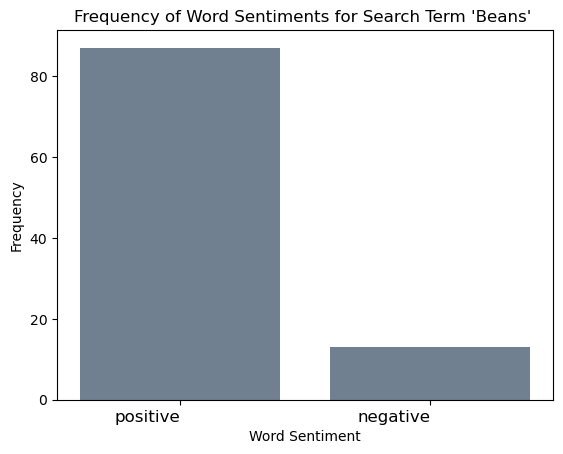

In [19]:
# Let's run a configuration to make prettier plots
plt.rcdefaults()

# Help with this graph was taken from https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart\

neg = 0
pos = 0


for i in range(len(sentiment_labels)): 
    if sentiment_labels[i] == 1:
        pos +=1
    else: 
        neg +=1
        
heights= [pos, neg]

labels = ('positive', 'negative')
y_p = np.arange(len(labels))

plt.bar(y_p,heights, color='slategrey')
plt.xticks(y_p, labels, color='black', fontsize='12', horizontalalignment='right')

plt.xlabel('Word Sentiment')
plt.ylabel('Frequency')
plt.title("Frequency of Word Sentiments for Search Term 'Beans' ")
plt.show()



# new[[1, -1].plot.bar()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 4.2

**Write up!** Let's compare these results with our hypothesis **(Q1)**.
* How accurate was your hypothesis?
* What do you think could have caused your guess being very accurate or inaccurate? 

We will see another way of looking at this data to find more explanations in the next part.

I was correct in stating that the resuts would skew positive. However, I predicted most of the results to be neutral which did not end up being an option in our analysis. I used my own opinion and experience to create my hypothesis. The way that I feel about the search term influenced how I predicted others would feel. In this case, I turned out to be correct. However, this is not a scientific approach to creating a hypothesis and is a method that is bound to cause errors down the road

<!-- END QUESTION -->

### Another Visualization: Wordclouds

For a slightly more colorful view at the overall data, we can use a wordcloud module!

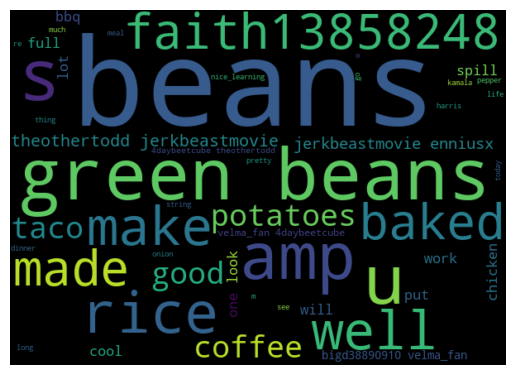

In [21]:
def get_all_words(data2plot):
    
    overallWords = ' '

    for entry in data2plot:
        for word in entry:
            overallWords += word + ' '

    return overallWords

wordcloud = WordCloud(width=600, height=430, max_words=50).generate(get_all_words(data))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Now, let's look at wordclouds based on the sentiment! To do this, we split up the data into one list of lists of all positive tweets and one for all negative tweets.

In [22]:
positive_data = [i for indx,i in enumerate(data) if sentiments[indx] == 1]

negative_data = [i for indx,i in enumerate(data) if sentiments[indx] == -1]

<!-- BEGIN QUESTION -->

### Problem 4.3

**Do this!** Create one wordcloud for the postive tweets and one for the negative tweets, that _intuitivley_ visualizes your results. 
* Use a different `colormap` for each wordcloud (check out the availbale colormaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)) **and/or** 
* play with the `background_color` (check out the available colors [here](https://matplotlib.org/stable/gallery/color/named_colors.html)).
* Add appropriate titles to your subplots. 

> **Hint**: Follow the example above and use `get_all_words()`.

> **[🐍 Python Feature 🐍]**: We can create figures with **multiple plots** using `plt.subplot`. The first number indicates the number of rows, the second input is the number of columns and the third is the plot you want to fill next. Like if you want to plot into the lower right corner of a figure with four plots in a 2x2 grid, then you would use `plt.subplot(224)` 

*Note: this question is graded on style/design choices of your visualization and not just on correctness alone.*

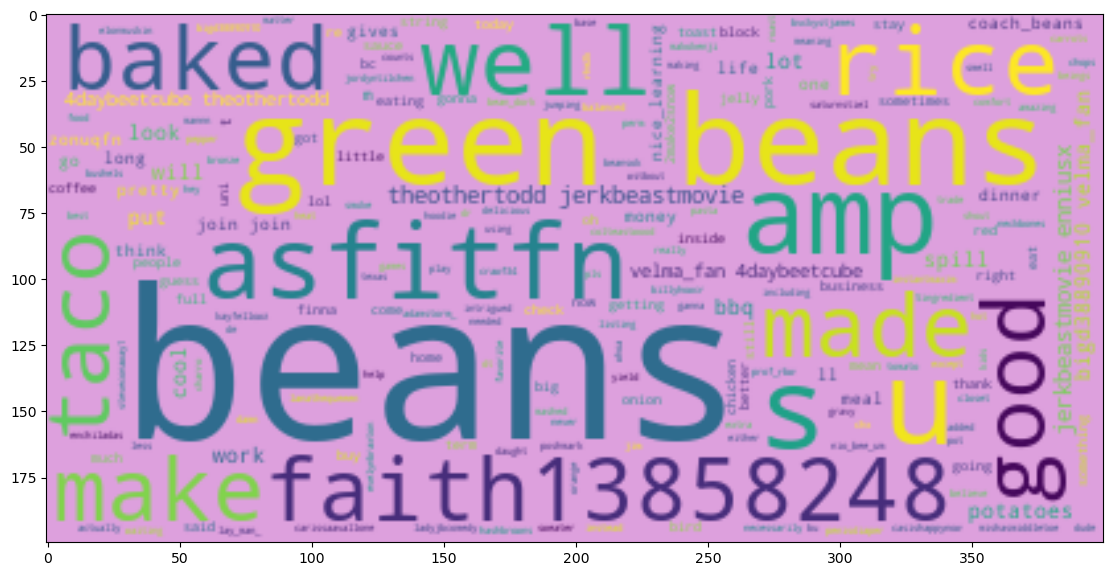

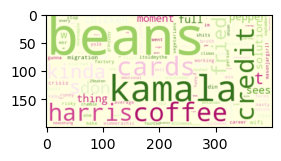

In [63]:
plt.figure(figsize=(30,15))
plt.subplot(121)

pos_wordcloud = WordCloud(background_color="plum").generate(get_all_words(positive_data))

plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.show()


plt.subplot(122)

neg_wordcloud = WordCloud(colormap='PiYG', background_color="lightyellow").generate(get_all_words(negative_data))

plt.imshow(neg_wordcloud, interpolation="bilinear")

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5. Summarize your Findings

### Problem 5.1

**Write up!** The visualizations reveal a lot of information about your Twitter data. Describe your basic findings by answering the following questions:

- What was the overall sentiment? 
- What were some of the most/least frequent words that were used (larger = more common)? 
- Why do you think this is? 
- Do you believe this would be different during different weeks?
- How do the words used and their frquency differ for positive versus negative sentiments?

The overall sentiment was positive, as most of the tweets (as far as I can tell from the word cloud) were about recipes. 

The most frequent words were other foods, or ways of preparing beans. Green-beans, baked, rice and coffee were all frequent words. Kamala Harris was also a frequent word in the negative sentiment category. 

The frequent words related to food were mostly in the positive sentiment category. I imagine this is because people are discussing recipes or favorite foods. The fact that 'coffee' was in the negative category was initially confusing until I realized that Kamala Harris was likely a common occurence in the negative category because of new legislation driven by her, surrounding the import of coffee beans. 

During different weeks this would likely change quite a bit. I doubt Kamala Harris would always come up frequently, and there may be other social or political events that become relevant for this word. 

The input word was (as I expected) the most frequent for positive and negative categories. However, most of the other words were different and did not appear in both word clouds. 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 5.2

**Write up!** Elaborate on one specific thing or insight from your analysis that you find particularly interesing. 

I enjoyed this analysis because I chose a word at random - 'beans'. I did not think that this word had any particularly positive or negative connotations and that it would be relatively neutral. However, this analysis suprised me in two ways. The first being that it was overwhelmingly positive. The more I thought about it, the more I realized that a lot of the contexts I deem 'neutral' are actually pretty positive - such as promoting recipes and talking about food. 

I also thought it was very cool that Kamala Harris showed up as one of the most frequent words. It goes to show that the connotation of any word might not be what you expect, and the sentiment surrounding that word can change day to day depending on larger social and political contexts. 

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [64]:
grader.check_all()

q2.2 results: All test cases passed!

q2a results: All test cases passed!

q2c results: All test cases passed!

q3b results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [65]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)